<a href="https://colab.research.google.com/github/marclamberts/football-analysis/blob/main/CF%20Outlier%20Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Import Libraries
import pandas as pd
import numpy as np

# STEP 3: Load Excel File from Google Drive
# Replace 'your_file.xlsx' with your actual path in Drive
file_path = '/content/drive/MyDrive/Database March 2025/Austria 2024-2025.xlsx'
df = pd.read_excel(file_path)
# STEP 4.1: Filter for players with >= 500 minutes and Position includes 'CF'
df_filtered = df[(df['Minutes played'] >= 500) & (df['Position'].str.contains('CF', na=False))]

# STEP 4.2: Choose a performance column (e.g., 'xG')
metric_col = 'xG'  # change this to your relevant column

# STEP 5: Calculate z-scores
mean = df_filtered[metric_col].mean()
std = df_filtered[metric_col].std()
df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std

# STEP 6: Classify Players into Tiers
def classify_tier(z):
    if z > 2.5:
        return 'Tier 1'
    elif 1.5 < z <= 2.5:
        return 'Tier 2'
    elif 1.0 < z <= 1.5:
        return 'Tier 3'
    elif z < -1.0:
        return 'Tier 5'
    else:
        return 'Tier 4'

df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)

# STEP 7: Display Top Outliers (Tier 1–3 only)
df_outliers = df_filtered[df_filtered['Outlier_Tier'].isin(['Tier 1', 'Tier 2', 'Tier 3'])]
df_outliers.sort_values('z_score', ascending=False).head(10)


<ipython-input-7-4561c7a3e805>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std
<ipython-input-7-4561c7a3e805>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)


,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,...,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %",z_score,Outlier_Tier
50,D. Beljo,Rapid Wien,Rapid Wien,CF,23,4000000,2027-06-30,20,1731,9,...,NaN,NaN,0.05,0.05,0.0,0.00,4,75.000,2.793503,Tier 1
11,B. Bobzien,Austria Klagenfurt,Austria Klagenfurt,"CF, AMF",21,500000,2026-06-30,22,2005,9,...,NaN,NaN,0.09,0.00,0.0,0.45,6,83.333,2.352479,Tier 2
42,Ronivaldo,Blau-Weiß Linz,Blau-Weiß Linz,CF,35,350000,2025-06-30,21,1756,13,...,NaN,NaN,0.10,0.10,50.0,0.00,1,100.000,2.202915,Tier 2
89,M. Biereth,Monaco,Sturm Graz,"CF, RWF",22,7000000,2028-06-30,16,1354,11,...,NaN,NaN,0.00,0.00,0.0,0.00,0,0.000,1.984320,Tier 2
111,M. Entrup,LASK,LASK,CF,27,2000000,2029-06-30,16,1153,7,...,NaN,NaN,0.00,0.00,0.0,0.00,0,0.000,1.347712,Tier 3
81,P. Mijić,Hartberg,Hartberg,CF,26,400000,2027-06-30,22,1422,8,...,NaN,NaN,0.00,0.00,0.0,0.00,1,100.000,1.278683,Tier 3
36,M. Malone,Austria Wien,Austria Wien,"CF, LAMF",24,1000000,2027-06-30,22,1813,8,...,NaN,NaN,0.00,0.00,0.0,0.00,0,0.000,1.159798,Tier 3


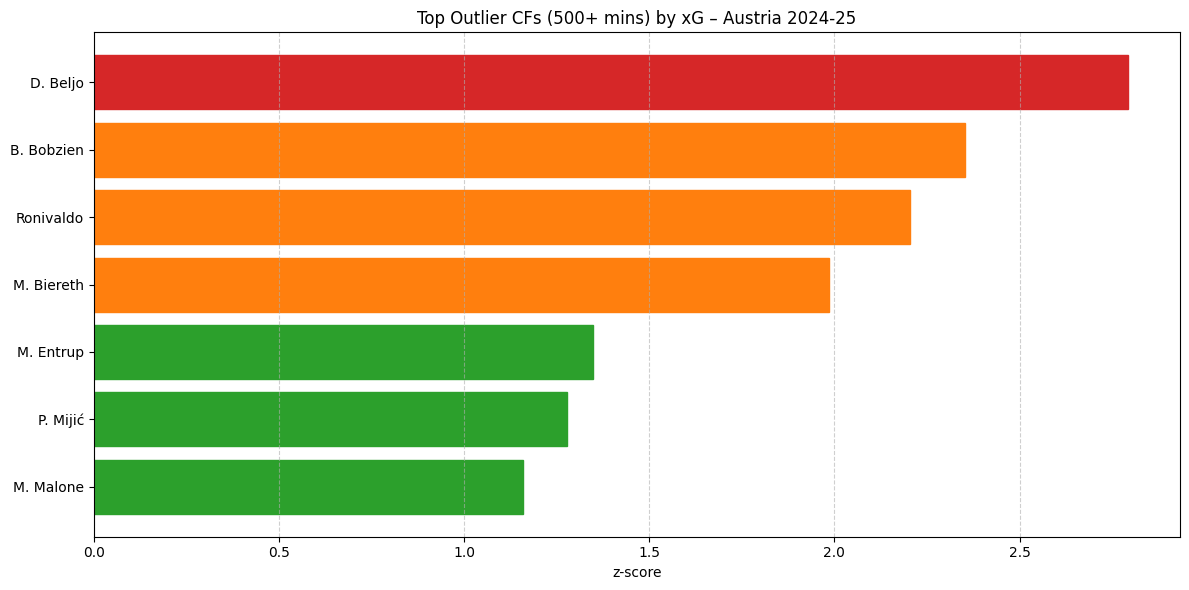

In [3]:
import matplotlib.pyplot as plt

# Optional: Sort and keep top 20 outliers for clarity
top_outliers = df_outliers.sort_values('z_score', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(top_outliers['Player'], top_outliers['z_score'], color='skyblue')

# Color bars based on Outlier_Tier
tier_colors = {
    'Tier 1': '#d62728',   # Red
    'Tier 2': '#ff7f0e',   # Orange
    'Tier 3': '#2ca02c',   # Green
}
for bar, tier in zip(bars, top_outliers['Outlier_Tier']):
    bar.set_color(tier_colors.get(tier, 'grey'))

# Plot settings
plt.xlabel('z-score')
plt.title('Top Outlier CFs (500+ mins) by xG – Austria 2024-25')
plt.gca().invert_yaxis()  # Highest z-score at top
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='Minutes played',
    y='xG',
    hue='Outlier_Tier',
    palette=tier_colors,
    style='Outlier_Tier',
    s=100
)

plt.title('xG vs Minutes Played (CFs with 500+ mins)')
plt.xlabel('Minutes Played')
plt.ylabel('xG')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Tier')
plt.tight_layout()
plt.show()


ValueError: The palette dictionary is missing keys: {'Tier 4', 'Tier 5'}

<Figure size 1000x600 with 0 Axes>

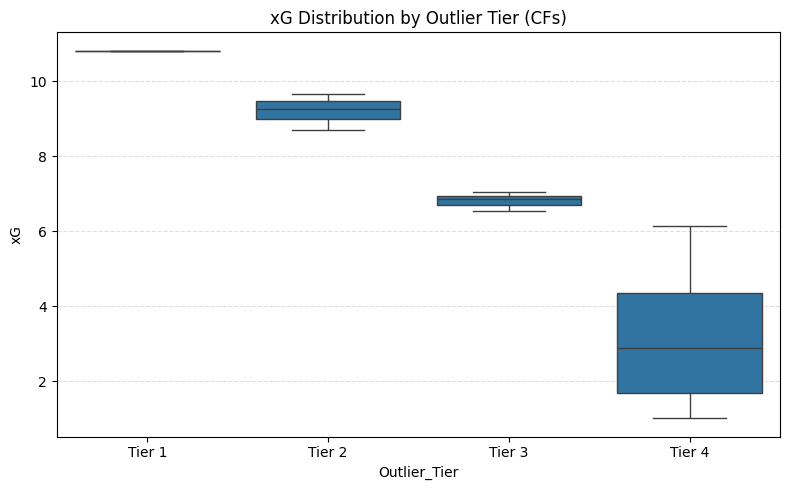

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_filtered[df_filtered['Outlier_Tier'].isin(['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'])],
    x='Outlier_Tier',
    y='xG',
    order=['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4']
)
plt.title('xG Distribution by Outlier Tier (CFs)')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


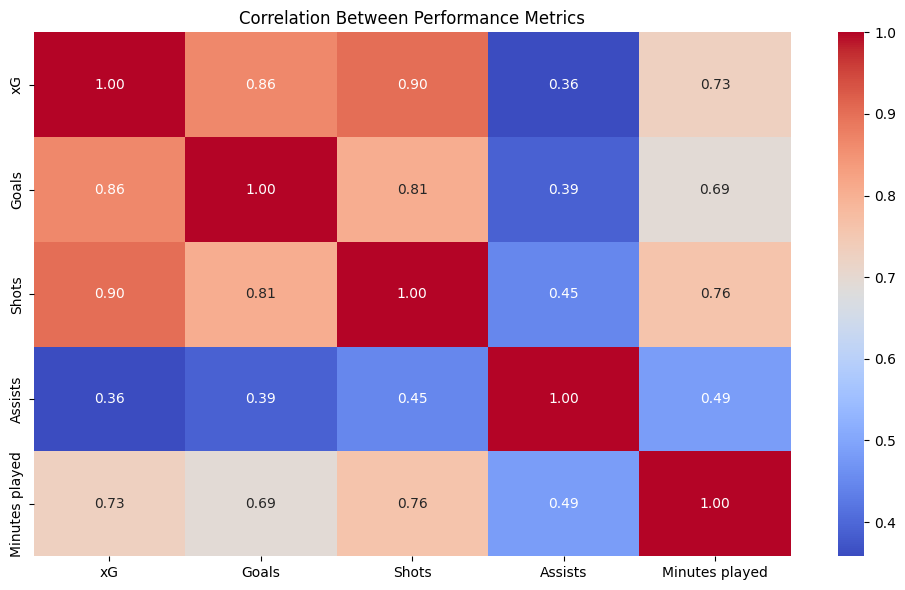

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_filtered[['xG', 'Goals', 'Shots', 'Assists', 'Minutes played']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Correlation Between Performance Metrics')
plt.tight_layout()
plt.show()
